### Analysing Second Hand Car Sales Data with Supervised and Unsupervised Learning Models



- This project analyses a mock dataset of second hand car sales in the UK. You can download this dataset as a csv file from Canvas at the following link:
- https://canvas.hull.ac.uk/files/5020067/download?download_frd=1
- The dataset contains 50,000 rows, with each row corresponding to the sale of a second hand car. For each car sold, the dataset contains the following information:
- • Manufacturer – the name of the manufacturer that produced the car.
- • Model – the name of the model of the car.
- • Engine size – the size of the engine, in litres.
- • Fuel type – the type of fuel that the engine uses.
- • Year of manufacture – the year in which the car was made.
- • Mileage – the total number of miles that the car has been driven.
- • Price – the price that the car was sold for, in Pound Sterling (GBP).

- NOTE: whilst the names of the car manufacturers and models in this dataset may be familiar, this is a mock dataset of imaginary car sales data that we generated.

- In particular, the prices given in this dataset are not intended to be a realistic representation of the actual price of a given car. Furthermore, the years of manufacture contained in this dataset do not necessarily reflect the actual years in which a particular model was in production in the real world.


- The goal for this project is to explore how supervised learning models can be used topredict the price of a second hand car, based on the information contained in this dataset.You will also study how unsupervised learning techniques can be used to identify clustering patterns in this dataset.

- This report is expected to address the following questions:

- a. Compare regression models that predict the price of a car based on a single numerical input feature. Based on your results, which numerical variable in the dataset is the best predictor for a car’s price, and why? For each numerical input feature, is the price better fit by a linear model or by a non-linear (e.g. polynomial) model?

- b. Consider regression models that take multiple numerical variables as input features to predict the price of a car. Does the inclusion of multiple input features improve the accuracy of the model’s prediction compared to the single-input feature models that you explored in part (a)?

- c. In parts (a) and (b) you only considered models that use the numerical variables from the dataset as inputs. However, there are also several categorical variables in the dataset that are likely to affect the price of the car. Now train a regression model that uses all relevant input variables (both categorical and numerical) to predict the price (e.g. a Random Forest Regressor model). Does this improve the accuracy of the results?

- d. Develop an Artificial Neural Network (ANN) model to predict the price of a car basedon all the available information from the dataset. How does its performance compare to the other supervised learning models that have been considered? Discuss the choices for the architecture of the neural network that you used, and describe how  tuning  the hyperparameters in the model achieve the best performance.

- e. Based on the results of your analysis, what is the best model for predicting the priceof a car and why? You should use suitable figures and evaluation metrics to support the conclusions.

- f. Use the k-Means clustering algorithm to identify clusters in the car sales data. Consider different combinations of the numerical variables in the dataset to use asinput features for the clustering algorithm. In each case, what is the optimal numberof clusters (k) to use and why? Which combination of variables produces the best clustering results? Using appropriate evaluation metrics to support the conclusions.

- g. Compare the results of the k-Means clustering model from part (f) to at least oneother clustering algorithm. Which algorithm produces the best clustering? Using suitable evaluation metrics to justify your answers

# Exercise 1

### Import the python libraries and load the data

In [1]:
# Import the basic python libraries
import numpy as np # for numerical computing
import pandas as pd # for loading the data set and carrying out vital analysis
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting

In [2]:
car_sales_df = pd.read_csv('car_sales_data.csv')

In [3]:
car_sales_df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [4]:
car_sales_df.tail()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
49995,BMW,M5,5.0,Petrol,2018,28664,113006
49996,Toyota,Prius,1.8,Hybrid,2003,105120,9430
49997,Ford,Mondeo,1.6,Diesel,2022,4030,49852
49998,Ford,Focus,1.0,Diesel,2016,26468,23630
49999,VW,Golf,1.4,Diesel,2012,109300,10400


In [5]:
car_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


- There are three (3) columns of object data type,three (3) columns of integer data type and one (1) column of float data type
- There are no columns with missing data

In [6]:
# checking for empty rows
car_sales_df.isnull()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False


In [7]:
# checking for empty rows
car_sales_df.isnull().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

In [8]:
# check the statistical summary
car_sales_df.describe()

,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


In [9]:
# confirm the number of rows and columns in the data set
car_sales_df.shape

(50000, 7)

In [10]:
# conftming the columns names in the data set
car_sales_df.columns

Index(['Manufacturer', 'Model', 'Engine size', 'Fuel type',
       'Year of manufacture', 'Mileage', 'Price'],
      dtype='object')

In [11]:
car_sales_df["Price"]

0          3074
1         49704
2         24072
3          1705
4          4101
          ...  
49995    113006
49996      9430
49997     49852
49998     23630
49999     10400
Name: Price, Length: 50000, dtype: int64

In [12]:
car_sales_df["Price"].describe()

count     50000.000000
mean      13828.903160
std       16416.681336
min          76.000000
25%        3060.750000
50%        7971.500000
75%       19026.500000
max      168081.000000
Name: Price, dtype: float64

- the mean Price of car sales is 13828.9 GBP
- the median Price  is at 50% which is 7971.5 GBP
- the lowest Price observed is 76.0 GBP
- while the highest Price of car sale is 168081.0 GBP

In [13]:
car_sales_df["Price"].mode().round(0) # the modal price (price with the highest occurence) is 1610 GBP

0    1610
Name: Price, dtype: int64

### Exploratory Data Analysis

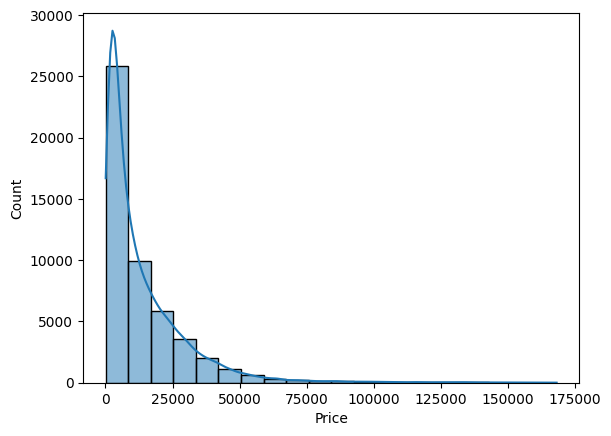

In [14]:
Eploratory_plot = sns.histplot(car_sales_df["Price"], bins = 20, # Univariate plot using histogram                                    
kde = True)

# Histplot was consider because the Price of car sales was a continuos (numerical) value

In [15]:
#testing by using shapiro-wick test:
import math
import numpy as np
from scipy.stats import shapiro

# make this example reproducible
np.random.seed(1)

# performing shapiro-wick test
shapiro(car_sales_df["Price"])


# From the above plot, it could be observed that the distribution is skewed to the right.
# It is therefore not normaly distributed.

# An alternative way to test for normality of the distribution is the shapiro-wick test and the chromogropgh test
# if p value > 0.5, then it said to be normally distributed(symmetric distribution)

C:\Program Files\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7250890135765076, pvalue=0.0)

 - pvalue is 0.0 which is less than 0.5 and therefore not normaly distributed 

In [16]:
# Using scatterplot analysis to check the relationship between Price of car sales and other numerical inputs which are:
 # Engine size,Year of manufacture and Mileage

# Scatterplot was considered the best options becuase the values are numerical in nature

# 1. A plot of Price (y-axis) versus Engine size (x-axis).
# 2. A plot of Price (y-axis) versus Year of manufacture (x-axis).
# 3. A plot of Price (y-axis) versus Mileage (x-axis)

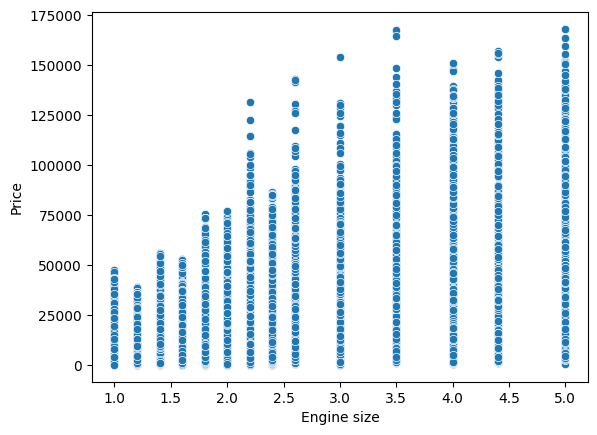

In [17]:

# A plot of Price (y-axis) versus Engine size (x-axis)
plot_1 = sns.scatterplot(data = car_sales_df, x = "Engine size",y = "Price")

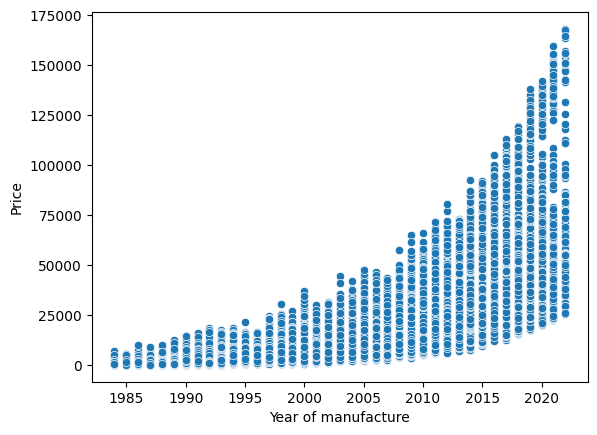

In [18]:
# A plot of Price (y-axis) versus Year of manufacture (x-axis)
plot_2 = sns.scatterplot(data = car_sales_df, x = "Year of manufacture",y = "Price")

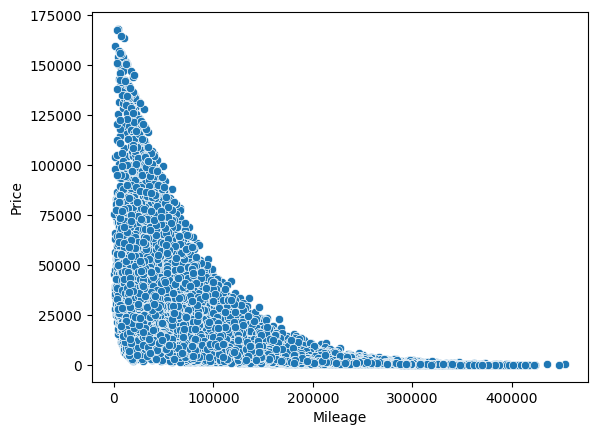

In [19]:
# A plot of Price (y-axis) versus Mileage (x-axis)
plot_3 = sns.scatterplot(data = car_sales_df, x = "Mileage",y = "Price")

In [20]:
# To determine the strength of these trends, we can calculate the correlation coefficients
# between each variable, using Seaborn to create a heat map of the correlation matrix between these variables.


column_list = ["Engine size", "Year of manufacture", "Mileage",]

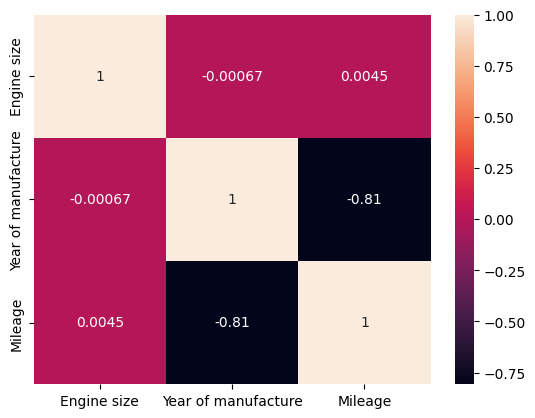

In [21]:
plot_4 = sns.heatmap(car_sales_df[column_list].corr(), annot = True)

In [22]:
numeric_columns = car_sales_df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = car_sales_df[numeric_columns]
correlation_matrix = numeric_df.corr()


In [23]:
correlation_matrix

,Engine size,Year of manufacture,Mileage,Price
Engine size,1.000000,-0.000675,0.004470,0.398371
Year of manufacture,-0.000675,1.000000,-0.807458,0.714209
Mileage,0.004470,-0.807458,1.000000,-0.632692
Price,0.398371,0.714209,-0.632692,1.000000


- The strongest corelation with price of car sale is the year of manufacture: 0.71
    - The higher the Year of manufacture (the more recent), the higher the price
    
- The next corelation exists is with the Mileage on car: 0.63
    - Inversely moderately related: The higher the Mileage, the lower the lower the price
        
- The weakest corelation on price of car sale is the Engine size: 0.39:

### Exercise 1 A

### Compare regression models that predict the price of a car based on a single numerical input feature

In [24]:
from sklearn.model_selection import train_test_split 
# for splitting of dataset into training and testing

from sklearn.linear_model import LinearRegression
# for implementing linear regression and modeling the relationship between the variables

from sklearn.preprocessing import PolynomialFeatures # for generation of polymnomial inputs

from sklearn.metrics import mean_squared_error, r2_score # for computation of MSE

from sklearn.metrics import mean_absolute_error, mean_squared_error ## for computation of MAE

 # for computation of R2
from sklearn.metrics import r2_score


import numpy as np # for numerical computation

#### Evaluating for Engine size

In [25]:

# Linear Regression

numerical_features = ["Engine size"]

for data1 in numerical_features:
    X = car_sales_df[[data1]].values 
    y = car_sales_df["Price"].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

    # Linear regression model
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train) # to fit
    y_pred_linear = linear_model.predict(X_test) # to predict

    # Computing for the  metrics
    gradient = linear_model.coef_[0]
    intercept = linear_model.intercept_
    mae_linear = mean_absolute_error(y_test, y_pred_linear)
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    rmse_linear = np.sqrt(mse_linear)
    r2_linear = r2_score(y_test, y_pred_linear)

    print(f"Results for {data1}:")
    print("Linear Model:")
    print("  Gradient:", gradient)
    print("  Intercept:", intercept)
    print("  MAE:", mae_linear)
    print("  MSE:", mse_linear)
    print("  RMSE:", rmse_linear)
    print("  R-squared:", r2_linear)


Results for Engine size:
Linear Model:
  Gradient: 8907.103044246276
  Intercept: -1939.6690956336042
  MAE: 10817.49156255791
  MSE: 230499154.45279127
  RMSE: 15182.198604049128
  R-squared: 0.15062562461380213


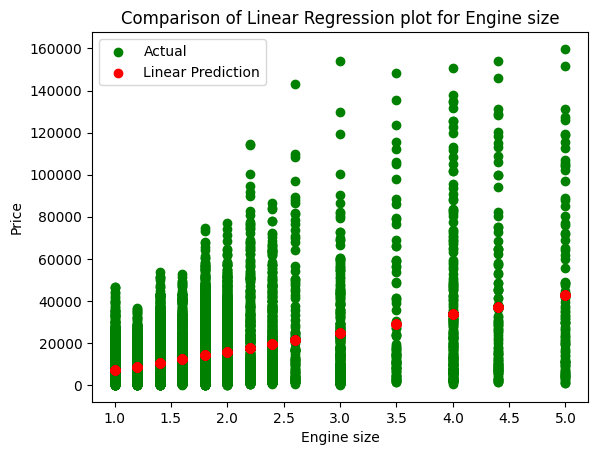

In [26]:
# Visualization of the linear model

plt.scatter(X_test, y_test, color='green', label='Actual')
plt.scatter(X_test, y_pred_linear, color='red', label='Linear Prediction')

plt.xlabel(data1)
plt.ylabel('Price')
plt.legend()
plt.title(f"Comparison of Linear Regression plot for {data1}")
plt.show()

In [27]:
# Non linear (Polymnomial Regression)

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_train_poly, X_test_poly, _, _ = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Computing the metrics
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Model (Degree=2):")
print("  MAE:", mae_poly)
print("  MSE:", mse_poly)
print("  RMSE:", rmse_poly)
print("  R-squared:", r2_poly)


Polynomial Regression Model (Degree=2):
  MAE: 10807.262347148488
  MSE: 230326165.9994689
  RMSE: 15176.500452985494
  R-squared: 0.15126307580028708


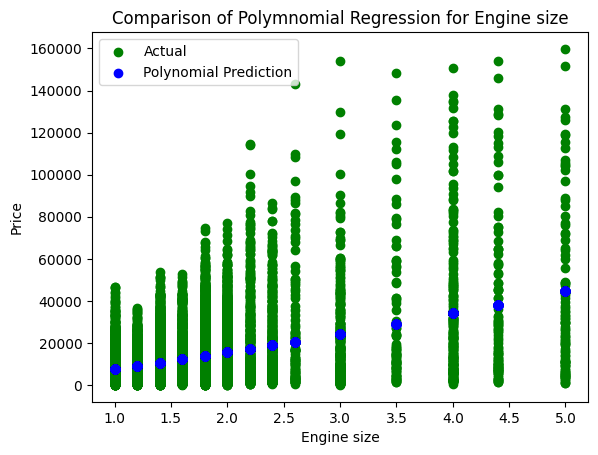

In [28]:
# Visualization of the polymnomial model

plt.scatter(X_test, y_test, color='green', label='Actual')
plt.scatter(X_test, y_pred_poly, color='blue', label='Polynomial Prediction')
plt.xlabel(data1)
plt.ylabel('Price')
plt.legend()
plt.title(f"Comparison of Polymnomial Regression for {data1}")
plt.show()

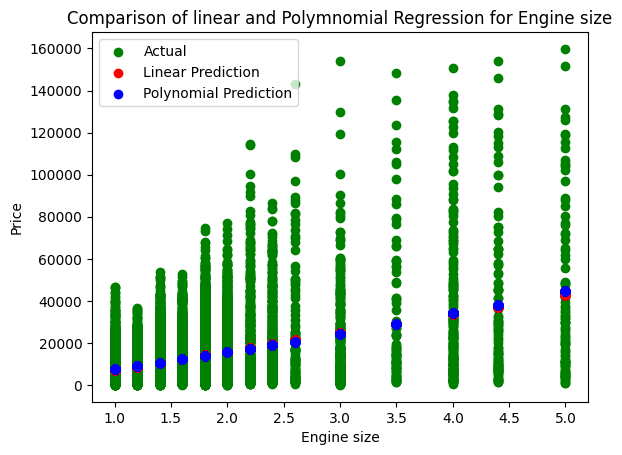

In [29]:
# Comparison plot of Linear and Polymnomial Regression

plt.scatter(X_test, y_test, color='green', label='Actual')
plt.scatter(X_test, y_pred_linear, color='red', label='Linear Prediction')
plt.scatter(X_test, y_pred_poly, color='blue', label='Polynomial Prediction')
plt.xlabel(data1)
plt.ylabel('Price')
plt.legend()
plt.title(f"Comparison of linear and Polymnomial Regression for {data1}")
plt.show()

#### Evaluating for Year of manufacture

In [30]:
# Linear Regression

numerical_features = ["Year of manufacture"]

for data2 in numerical_features:
    X = car_sales_df[[data2]].values 
    y = car_sales_df["Price"].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

    # Linear regression model
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)

    # Calculating additional metrics
    gradient = linear_model.coef_[0]
    intercept = linear_model.intercept_
    mae_linear = mean_absolute_error(y_test, y_pred_linear)
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    rmse_linear = np.sqrt(mse_linear)
    r2_linear = r2_score(y_test, y_pred_linear)

    print(f"Results for {data2}:")
    print("Linear Model:")
    print("  Gradient:", gradient)
    print("  Intercept:", intercept)
    print("  MAE:", mae_linear)
    print("  MSE:", mse_linear)
    print("  RMSE:", rmse_linear)
    print("  R-squared:", r2_linear)


Results for Year of manufacture:
Linear Model:
  Gradient: 1214.5568646876425
  Intercept: -2420400.623522724
  MAE: 7031.039208674805
  MSE: 132678999.94793086
  RMSE: 11518.637069893766
  R-squared: 0.5110865244812854


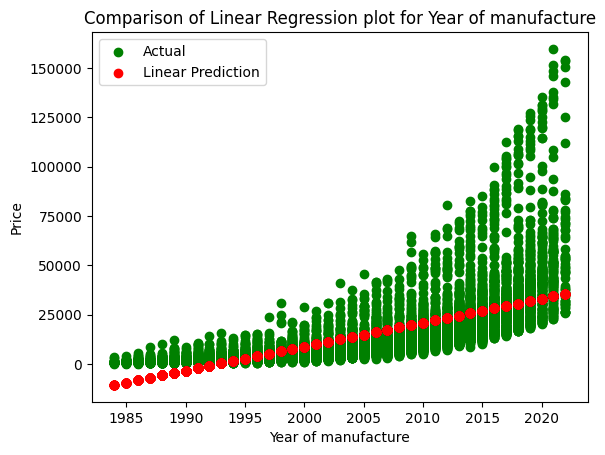

In [31]:
# Visualization of the linear model

plt.scatter(X_test, y_test, color='green', label='Actual')
plt.scatter(X_test, y_pred_linear, color='red', label='Linear Prediction')

plt.xlabel(data2)
plt.ylabel('Price')
plt.legend()
plt.title(f"Comparison of Linear Regression plot for {data2}")
plt.show()

In [32]:
# Non linear (Polymnomial Regression)

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_train_poly, X_test_poly, _, _ = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Calculating additional metrics
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Model (Degree=2):")
print("  MAE:", mae_poly)
print("  MSE:", mse_poly)
print("  RMSE:", rmse_poly)
print("  R-squared:", r2_poly)


Polynomial Regression Model (Degree=2):
  MAE: 5387.109074897877
  MSE: 105993894.20207708
  RMSE: 10295.333612956749
  R-squared: 0.6094194015749469


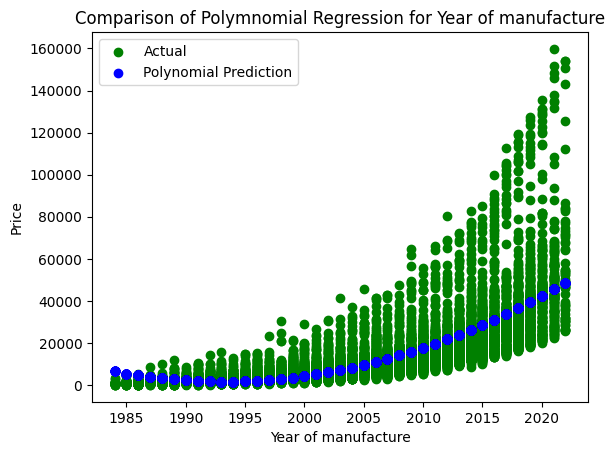

In [33]:
# Visualization of the linear model

plt.scatter(X_test, y_test, color='green', label='Actual')
plt.scatter(X_test, y_pred_poly, color='blue', label='Polynomial Prediction')
plt.xlabel(data2)
plt.ylabel('Price')
plt.legend()
plt.title(f"Comparison of Polymnomial Regression for {data2}")
plt.show()

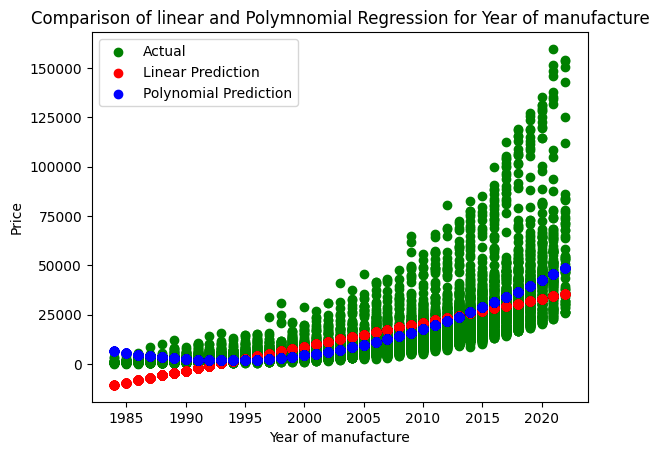

In [34]:
# Comparison plot of Linear and Polymnomial Regression

plt.scatter(X_test, y_test, color='green', label='Actual')
plt.scatter(X_test, y_pred_linear, color='red', label='Linear Prediction')
plt.scatter(X_test, y_pred_poly, color='blue', label='Polynomial Prediction')
plt.xlabel(data2)
plt.ylabel('Price')
plt.legend()
plt.title(f"Comparison of linear and Polymnomial Regression for {data2}")
plt.show()

#### Evaluating for Mileage

In [35]:
# Linear Regression

numerical_features = ["Mileage"]

for data3 in numerical_features:
    X = car_sales_df[[data3]].values 
    y = car_sales_df["Price"].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

    # Linear regression model
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)

    # Calculating additional metrics
    gradient = linear_model.coef_[0]
    intercept = linear_model.intercept_
    mae_linear = mean_absolute_error(y_test, y_pred_linear)
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    rmse_linear = np.sqrt(mse_linear)
    r2_linear = r2_score(y_test, y_pred_linear)

    print(f"Results for {data3}:")
    print("Linear Model:")
    print("  Gradient:", gradient)
    print("  Intercept:", intercept)
    print("  MAE:", mae_linear)
    print("  MSE:", mse_linear)
    print("  RMSE:", rmse_linear)
    print("  R-squared:", r2_linear)


Results for Mileage:
Linear Model:
  Gradient: -0.14496147339803006
  Intercept: 30121.882509750634
  MAE: 7964.78467002469
  MSE: 162468566.87254104
  RMSE: 12746.315815659875
  R-squared: 0.4013139100884707


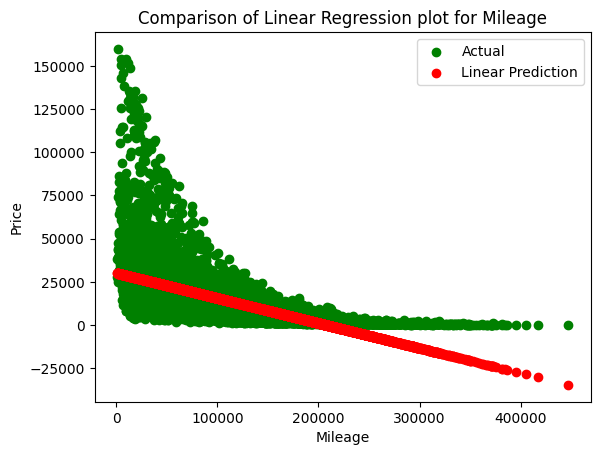

In [36]:
# Visualization of the linear model

plt.scatter(X_test, y_test, color='green', label='Actual')
plt.scatter(X_test, y_pred_linear, color='red', label='Linear Prediction')

plt.xlabel(data3)
plt.ylabel('Price')
plt.legend()
plt.title(f"Comparison of Linear Regression plot for {data3}")
plt.show()

In [37]:
# Non linear (Polymnomial Regression)

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_train_poly, X_test_poly, _, _ = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Calculating additional metrics
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Model (Degree=2):")
print("  MAE:", mae_poly)
print("  MSE:", mse_poly)
print("  RMSE:", rmse_poly)
print("  R-squared:", r2_poly)


Polynomial Regression Model (Degree=2):
  MAE: 6409.911605483246
  MSE: 129620312.16238311
  RMSE: 11385.091662449762
  R-squared: 0.5223575898069638


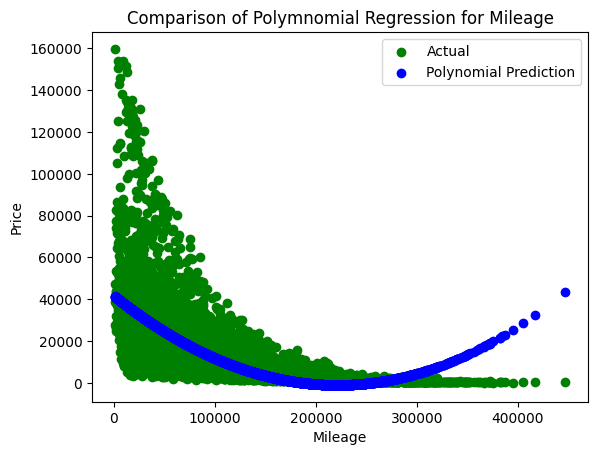

In [38]:
# Visualization of the Polymnomial model

plt.scatter(X_test, y_test, color='green', label='Actual')
plt.scatter(X_test, y_pred_poly, color='blue', label='Polynomial Prediction')
plt.xlabel(data3)
plt.ylabel('Price')
plt.legend()
plt.title(f"Comparison of Polymnomial Regression for {data3}")
plt.show()

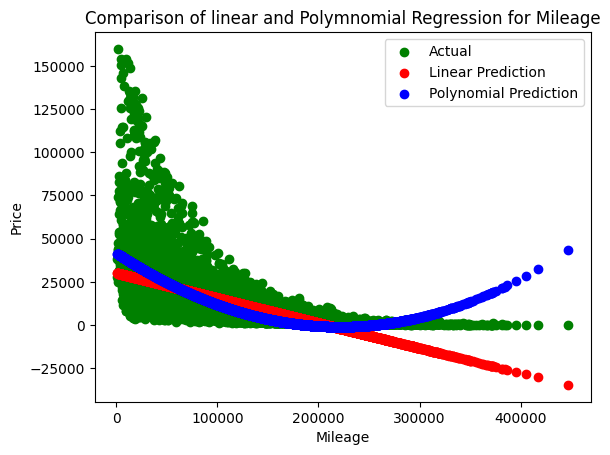

In [39]:
# Comparison plot of Linear and Polymnomial Regression

plt.scatter(X_test, y_test, color='green', label='Actual')
plt.scatter(X_test, y_pred_linear, color='red', label='Linear Prediction')
plt.scatter(X_test, y_pred_poly, color='blue', label='Polynomial Prediction')
plt.xlabel(data3)
plt.ylabel('Price')
plt.legend()
plt.title(f"Comparison of linear and Polymnomial Regression for {data3}")
plt.show()

### Exercise 1 B

### Consider regression models that take multiple numerical variables as input features to predict the price of a car

- While there are several regeression models for multiple numeriacal variables we shall consider two :
- namely ; multiple linear regression and polymnomial regression

In [46]:
# multiple linear regression

from sklearn.preprocessing import StandardScaler


scale = StandardScaler()

In [47]:
feature_names = ['Engine size', 'Year of manufacture', 'Mileage']
x = car_sales_df[feature_names]

x_train, x_test, y_train, y_test = train_test_split(x, y,
 test_size = 0.2, random_state = 42) # 80% of the data into train dataset and 20% into test dataset

scale = StandardScaler() #create an instance of the data scaler class
scale.fit(x_train) #fit the instance to the x_train to avoid data leakage
print(f'The mean and std deviations are:{scale.mean_} and {scale.scale_} respectively')

x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
     
car_sales_linear = LinearRegression() # create an instance
car_sales_linear.fit(x_train_scaled, y_train) # fit the instance
     
gradient = car_sales_linear.coef_[0]
intercept = car_sales_linear.intercept_
print("gradient: ", gradient)
print("intercept: ", intercept)
     
car_sales_pred = car_sales_linear.predict(x_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import numpy as np
mae = mean_absolute_error(y_test, car_sales_pred)
mse = mean_squared_error(y_test, car_sales_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test, car_sales_pred)
print(f'MAE:{mae:.2f}')
print(f'MSE:{mse:.2f}')
print(f'RMSE:{rmse:.2f}')
print(f'R-squared:{R2:.2f}')

The mean and std deviations are:[1.77322500e+00 2.00423325e+03 1.12217774e+05] and [7.38249009e-01 9.64271199e+00 7.15643626e+04] respectively
gradient:  6594.024480170219
intercept:  13854.628699999997
MAE:6091.46
MSE:89158615.76
RMSE:9442.38
R-squared:0.67


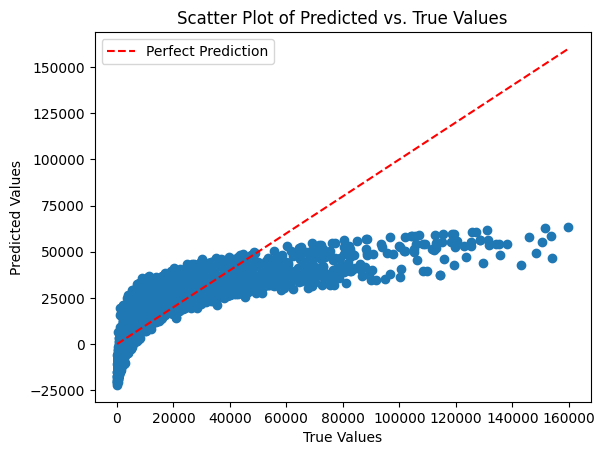

In [49]:
# Scatter plot of predicted vs. true values
plt.scatter(y_test, car_sales_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Scatter Plot of Predicted vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [48]:
# multiple polymnomial regression model

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define the degree of the polynomial
degree = 2  # You can change this to the desired degree

# Create a pipeline with PolynomialFeatures and LinearRegression
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the polynomial regression model
polyreg.fit(x_train, y_train)

# Make predictions on the test set
y_pred = polyreg.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {R2:.2f}')


MAE: 3196.56
MSE: 29311493.18
RMSE: 5414.01
R2: 0.89


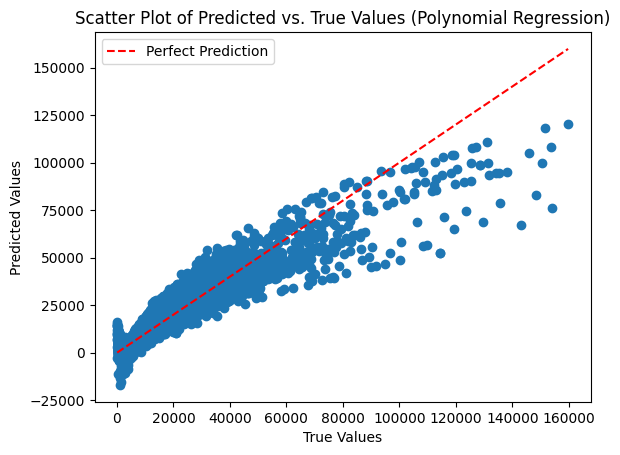

In [50]:
# Scatter plot of predicted vs. true values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Scatter Plot of Predicted vs. True Values (Polynomial Regression)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


### Exercise 1 C

### Training a regression model that uses all relevant input variables (both categorical and numerical) to predict the price

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Assuming car_sales_df is your DataFrame and Price is the target variable
x = car_sales_df[['Manufacturer', 'Model', 'Engine size', 'Fuel type', 'Year of manufacture', 'Mileage']]
y = car_sales_df['Price']

# Define numerical and categorical features
numerical_features = ['Engine size', 'Mileage', 'Year of manufacture']
categorical_features = ['Manufacturer', 'Model', 'Fuel type']

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Create a column transformer to apply transformers to the correct columns
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_features),('cat', categorical_transformer, categorical_features)])

# Create a pipeline with the column transformer and Random Forest Regressor
model = Pipeline(steps=[('preprocessor', preprocessor),('regressor', RandomForestRegressor(random_state=42))])

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse)**0.5
R2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {R2:.2f}')

print(f'MAE: {mae:}')
print(f'MSE: {mse:}')
print(f'RMSE: {rmse:}')
print(f'R2: {R2:}')


C:\Program Files\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


MAE: 287.69
MSE: 401091.51
RMSE: 633.32
R2: 1.00
MAE: 287.693997
MSE: 401091.50671473
RMSE: 633.3178559891786
R2: 0.9985220039145163


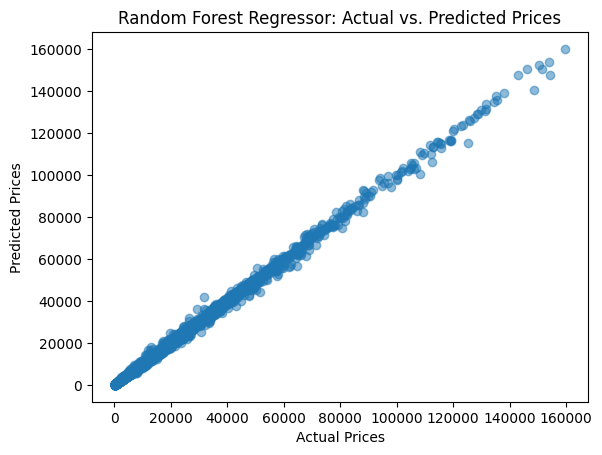

In [52]:
# Scatter plot of actual vs. predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Random Forest Regressor: Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

### Exercise 1 D

### Develop an Artificial Neural Network (ANN) model to predict the price of a car based on all the given information from the dataset

###### Preprocessing the inputs

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix



car_sales_df = pd.read_csv('car_sales_data.csv')

# Define features (x) and target variable (y)
numerical_features = ['Engine size', 'Year of manufacture', 'Mileage']
categorical_features = ['Manufacturer', 'Fuel type', 'Model']
target_variable = 'Price'

# Splitting the data into inpt (X) and output variable (y)
X = car_sales_df[numerical_features + categorical_features]
y = car_sales_df[target_variable]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  preprocessing numerical and categorical features 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)]) #using onehotencoder

# Build the preprocessing pipeline
preprocessing_pipeline = Pipeline([('preprocessor', preprocessor)])

# Fit and transform the training data using the preprocessor
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
X_train_preprocessed_dense = X_train_preprocessed.toarray()

# Split the preprocessed data into training and validation sets
X_train_preprocessed_dense, X_val_preprocessed_dense, y_train, y_val = train_test_split(
    X_train_preprocessed_dense, y_train, test_size=0.2, random_state=42)



###### Build the ANN Model

In [72]:
# Create an instance of the Sequential class.
# This will be our model.
model = Sequential()

# Add the first hidden layer, with
# input_dim = 6, 64 units, and the
# ReLU activation function.
model.add(Dense(units=64, input_dim=X_train_preprocessed_dense.shape[1], activation='relu'))

# Add a dropout layer with a 10% dropout rate.
model.add(Dropout(0.1))

# Second hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units=64, activation='relu'))

# Third hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units=64, activation='relu'))

# The output layer, this will have 1 unit
# because we are predicting one value
# (the price). Also, we will use the linear
# activation function, because this is a
# regression problem, predicting a
# continuous output variable.
model.add(Dense(units=1, activation='linear'))

# Print a summary of the model
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1728      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###### Complile and train the model, then make prediction using the history

In [74]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Define early stopping criterion
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# Train the model with the manually split training and validation sets
history = model.fit(X_train_preprocessed_dense, y_train, epochs=200, batch_size=None,
                    validation_data=(X_val_preprocessed_dense, y_val), verbose=1, callbacks=[early_stopping])

# Make predictions on the test set
X_test_preprocessed = preprocessing_pipeline.transform(X_test)
X_test_preprocessed_dense = X_test_preprocessed.toarray()
y_pred = model.predict(X_test_preprocessed_dense)


# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print or use the metrics as needed
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)


Epoch 1/200


1000/1000 [==============================] - 9s 7ms/step - loss: 127978408.0000 - mean_squared_error: 127978408.0000 - val_loss: 22717200.0000 - val_mean_squared_error: 22717200.0000
Epoch 2/200
1000/1000 [==============================] - 5s 5ms/step - loss: 15859031.0000 - mean_squared_error: 15859031.0000 - val_loss: 7016520.5000 - val_mean_squared_error: 7016520.5000
Epoch 3/200
1000/1000 [==============================] - 6s 6ms/step - loss: 7089969.0000 - mean_squared_error: 7089969.0000 - val_loss: 3024178.2500 - val_mean_squared_error: 3024178.2500
Epoch 4/200
1000/1000 [==============================] - 5s 5ms/step - loss: 4325324.0000 - mean_squared_error: 4325324.0000 - val_loss: 1688970.5000 - val_mean_squared_error: 1688970.5000
Epoch 5/200
1000/1000 [==============================] - 5s 5ms/step - loss: 3303211.0000 - mean_squared_error: 3303211.0000 - val_loss: 1107317.8750 - val_mean_squared_error: 1107317.8750
Epoch 6/200
1000/1000 [=====================

###### Visualize the model

C:\Users\user\AppData\Local\Temp\ipykernel_1288\1451280365.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k-', color='red', lw=2)


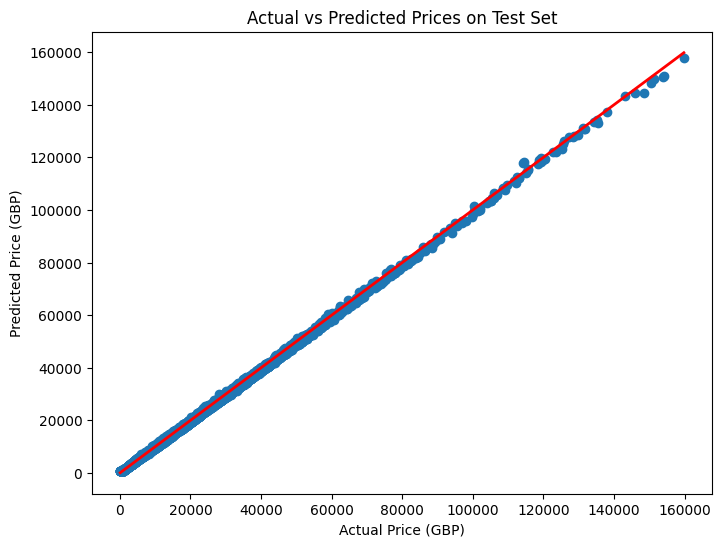

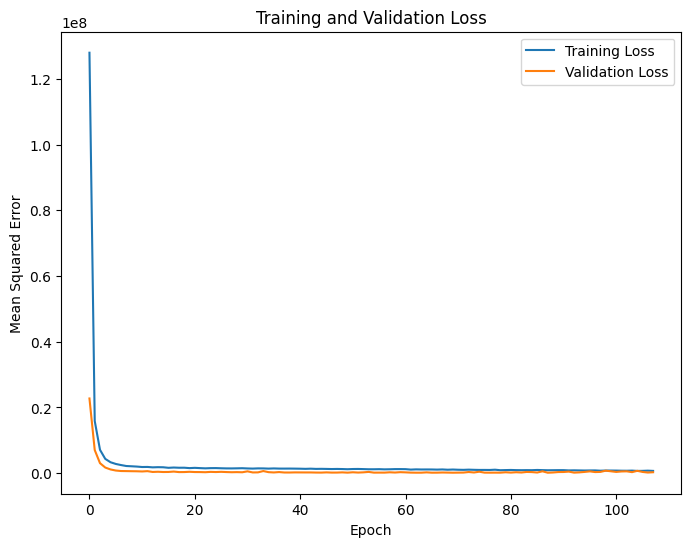

In [75]:
# Plot predicted vs actual prices on the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k-', color='red', lw=2)
plt.title('Actual vs Predicted Prices on Test Set')
plt.xlabel('Actual Price (GBP)')
plt.ylabel('Predicted Price (GBP)')
plt.show()

# Plot training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


##### Tuning the hyperparameters

In [47]:
# Tuning the number of layers in the network by building a new neural network model that adds a fourth hidden layer.
# Tuning by varying the dropout from 10% of 20%
# Tuning using learning rate of 0.01
# Tuning with a dropout of 10%


##### Tuning the hyperparameters 

###### Tuning the number of layers in the network by building a new neural network model that adds a fourth hidden layer.

In [76]:
# Creating  an instance of the Sequential class.
# This will be our model.
model = Sequential()

# Add the first hidden layer, with
# input_dim = 6, 64 units, and the
# ReLU activation function.
model.add(Dense(units=64, input_dim=X_train_preprocessed_dense.shape[1], activation='relu'))

# Add a dropout layer with a 10% dropout rate.
model.add(Dropout(0.1))

# Second hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units=64, activation='relu'))

# Third hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units=64, activation='relu'))

# fourth hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units=64, activation='relu'))



model.add(Dense(units=1, activation='linear'))

# Print a summary of the model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                1728      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 14273 (55.75 KB)
Trainable params: 14273

###### Compile and train the model and then make prediction from history of performance

In [77]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Define early stopping criterion
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# Train the model with the manually split training and validation sets
history = model.fit(X_train_preprocessed_dense, y_train, epochs=200, batch_size=None,
                    validation_data=(X_val_preprocessed_dense, y_val), verbose=1, callbacks=[early_stopping])

# Make predictions on the test set
X_test_preprocessed = preprocessing_pipeline.transform(X_test)
X_test_preprocessed_dense = X_test_preprocessed.toarray()
y_pred = model.predict(X_test_preprocessed_dense)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print or use the metrics as needed
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

Epoch 1/200
1000/1000 [==============================] - 7s 5ms/step - loss: 83243384.0000 - mean_squared_error: 83243384.0000 - val_loss: 8314071.5000 - val_mean_squared_error: 8314071.5000
Epoch 2/200
1000/1000 [==============================] - 5s 5ms/step - loss: 6199144.0000 - mean_squared_error: 6199144.0000 - val_loss: 1726575.7500 - val_mean_squared_error: 1726575.7500
Epoch 3/200
1000/1000 [==============================] - 6s 6ms/step - loss: 2860077.2500 - mean_squared_error: 2860077.2500 - val_loss: 877744.0625 - val_mean_squared_error: 877744.0625
Epoch 4/200
1000/1000 [==============================] - 5s 5ms/step - loss: 2144878.2500 - mean_squared_error: 2144878.2500 - val_loss: 506555.4062 - val_mean_squared_error: 506555.4062
Epoch 5/200
1000/1000 [==============================] - 6s 6ms/step - loss: 1940865.8750 - mean_squared_error: 1940865.8750 - val_loss: 437314.7500 - val_mean_squared_error: 437314.7500
Epoch 6/200
1000/1000 [==============================] - 5s

###### Visualize the model

C:\Users\user\AppData\Local\Temp\ipykernel_1288\505579764.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k-', color='red', lw=2)


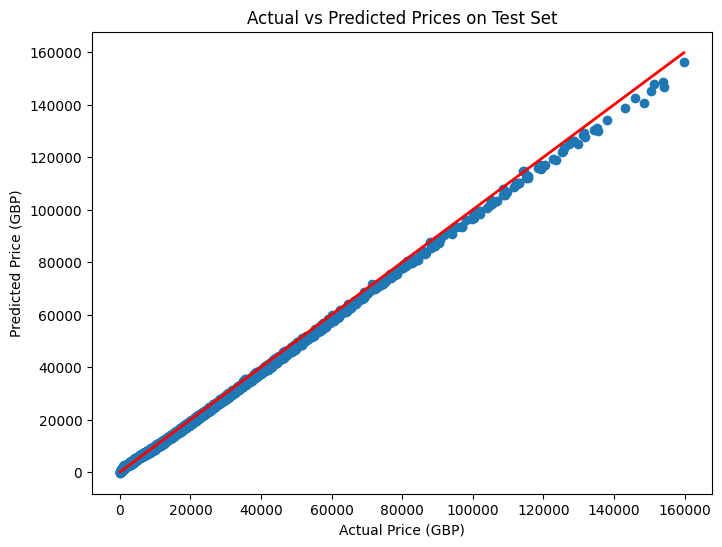

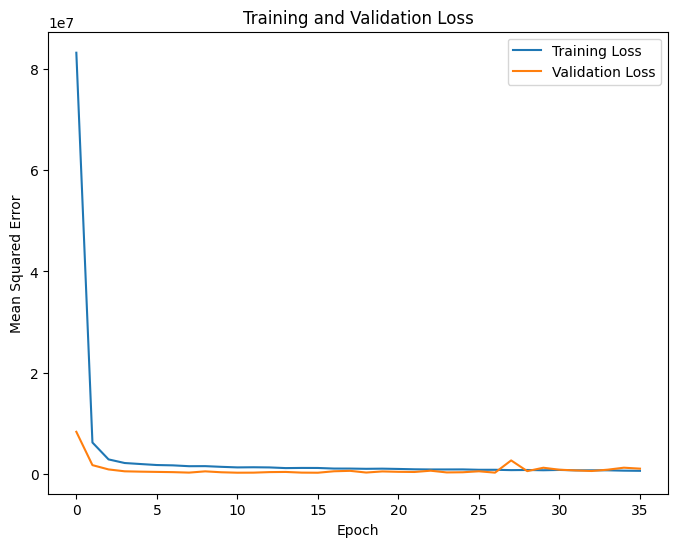

In [78]:
# Plot predicted vs actual prices on the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k-', color='red', lw=2)
plt.title('Actual vs Predicted Prices on Test Set')
plt.xlabel('Actual Price (GBP)')
plt.ylabel('Predicted Price (GBP)')
plt.show()

# Plot training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

###### Build the ANN model and tune by varying the dropout from 0.1 to 0.2

In [79]:

model = Sequential()

# Add the first hidden layer, with
# input_dim = 6, 64 units, and the
# ReLU activation function.
model.add(Dense(units=64, input_dim=X_train_preprocessed_dense.shape[1], activation='relu'))

# Add a dropout layer with a 20% dropout rate.
model.add(Dropout(0.2))

# Second hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units=64, activation='relu'))

# Third hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units=64, activation='relu'))

# fourth hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units=64, activation='relu'))



model.add(Dense(units=1, activation='linear'))

# Print a summary of the model
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                1728      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 14273 (55.75 KB)
Trainable params: 14273

###### Compile and train the moodel, then make prediction from history of performance

In [80]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Define early stopping criterion
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# Train the model with the manually split training and validation sets
history = model.fit(X_train_preprocessed_dense, y_train, epochs=200, batch_size=None,
                    validation_data=(X_val_preprocessed_dense, y_val), verbose=1, callbacks=[early_stopping])

# Make predictions on the test set
X_test_preprocessed = preprocessing_pipeline.transform(X_test)
X_test_preprocessed_dense = X_test_preprocessed.toarray()
y_pred = model.predict(X_test_preprocessed_dense)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print or use the metrics as needed
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

Epoch 1/200
1000/1000 [==============================] - 8s 6ms/step - loss: 89421560.0000 - mean_squared_error: 89421560.0000 - val_loss: 10578400.0000 - val_mean_squared_error: 10578400.0000
Epoch 2/200
1000/1000 [==============================] - 7s 7ms/step - loss: 9614607.0000 - mean_squared_error: 9614607.0000 - val_loss: 3360175.2500 - val_mean_squared_error: 3360175.2500
Epoch 3/200
1000/1000 [==============================] - 5s 5ms/step - loss: 5174915.5000 - mean_squared_error: 5174915.5000 - val_loss: 1256722.7500 - val_mean_squared_error: 1256722.7500
Epoch 4/200
1000/1000 [==============================] - 5s 5ms/step - loss: 4156480.5000 - mean_squared_error: 4156480.5000 - val_loss: 1154282.0000 - val_mean_squared_error: 1154282.0000
Epoch 5/200
1000/1000 [==============================] - 7s 7ms/step - loss: 3587918.0000 - mean_squared_error: 3587918.0000 - val_loss: 601633.8750 - val_mean_squared_error: 601633.8750
Epoch 6/200
1000/1000 [==============================

##### Visusalize the model

C:\Users\user\AppData\Local\Temp\ipykernel_1288\505579764.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k-', color='red', lw=2)


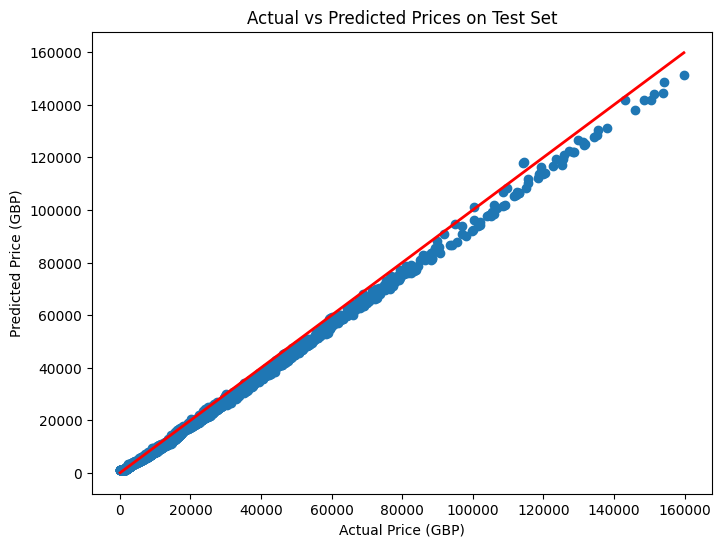

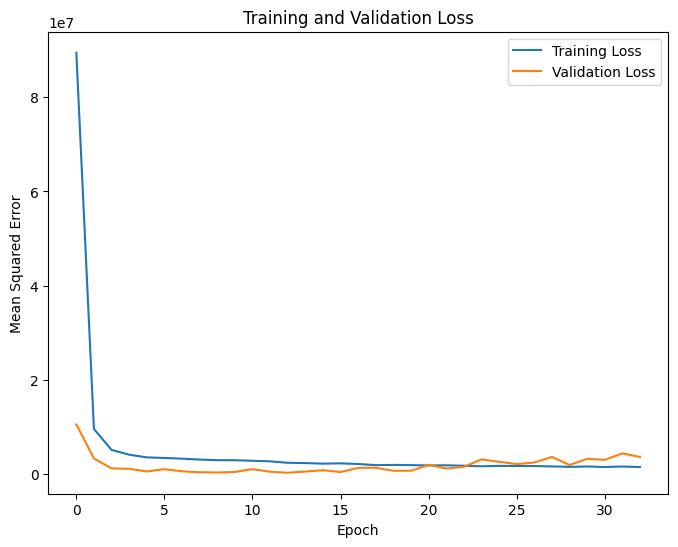

In [81]:
# Plot predicted vs actual prices on the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k-', color='red', lw=2)
plt.title('Actual vs Predicted Prices on Test Set')
plt.xlabel('Actual Price (GBP)')
plt.ylabel('Predicted Price (GBP)')
plt.show()

# Plot training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

##### Build the ANN Model and tuning by varying the Adam optimizer from default (0.001) to 0.01

In [82]:

from keras.optimizers import Adam

# Create an instance of the Adam class. We
# will set the learning_rate to 0.01 here.
adam_optimizer = Adam(learning_rate = 0.01)

# Create an instance of the Sequential class.
# This will be our model.
model = Sequential()



# Add the first hidden layer, with
# input_dim = 6, 64 units, and the
# ReLU activation function.
model.add(Dense(units=64, input_dim=X_train_preprocessed_dense.shape[1], activation='relu'))

# Add a dropout layer with a 20% dropout rate.
model.add(Dropout(0.2))

# Second hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units=64, activation='relu'))

# Third hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units=64, activation='relu'))

# fourth hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units=64, activation='relu'))




model.add(Dense(units=1, activation='linear'))

# Print a summary of the model
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                1728      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 14273 (55.75 KB)
Trainable params: 14273

##### Compile and train the model, then make prediction from history 

In [83]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Define early stopping criterion
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# Train the model with the manually split training and validation sets
history = model.fit(X_train_preprocessed_dense, y_train, epochs=200, batch_size=None,
                    validation_data=(X_val_preprocessed_dense, y_val), verbose=1, callbacks=[early_stopping])

# Make predictions on the test set
X_test_preprocessed = preprocessing_pipeline.transform(X_test)
X_test_preprocessed_dense = X_test_preprocessed.toarray()
y_pred = model.predict(X_test_preprocessed_dense)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print or use the metrics as needed
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

Epoch 1/200
1000/1000 [==============================] - 9s 7ms/step - loss: 87643640.0000 - mean_squared_error: 87643640.0000 - val_loss: 12539423.0000 - val_mean_squared_error: 12539423.0000
Epoch 2/200
1000/1000 [==============================] - 7s 7ms/step - loss: 8831791.0000 - mean_squared_error: 8831791.0000 - val_loss: 2468731.5000 - val_mean_squared_error: 2468731.5000
Epoch 3/200
1000/1000 [==============================] - 5s 5ms/step - loss: 4690848.5000 - mean_squared_error: 4690848.5000 - val_loss: 1901051.2500 - val_mean_squared_error: 1901051.2500
Epoch 4/200
1000/1000 [==============================] - 5s 5ms/step - loss: 4100763.7500 - mean_squared_error: 4100763.7500 - val_loss: 938364.5000 - val_mean_squared_error: 938364.5000
Epoch 5/200
1000/1000 [==============================] - 5s 5ms/step - loss: 3728926.5000 - mean_squared_error: 3728926.5000 - val_loss: 675971.6250 - val_mean_squared_error: 675971.6250
Epoch 6/200
1000/1000 [==============================] 

##### Visualize the model

C:\Users\user\AppData\Local\Temp\ipykernel_1288\505579764.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k-', color='red', lw=2)


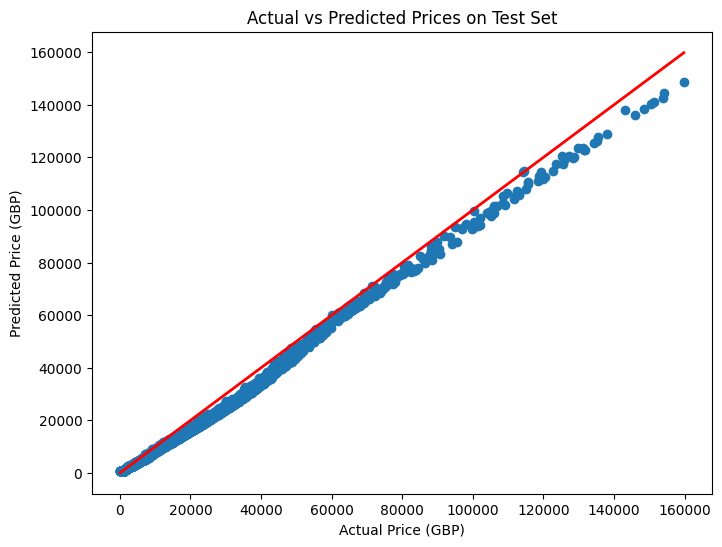

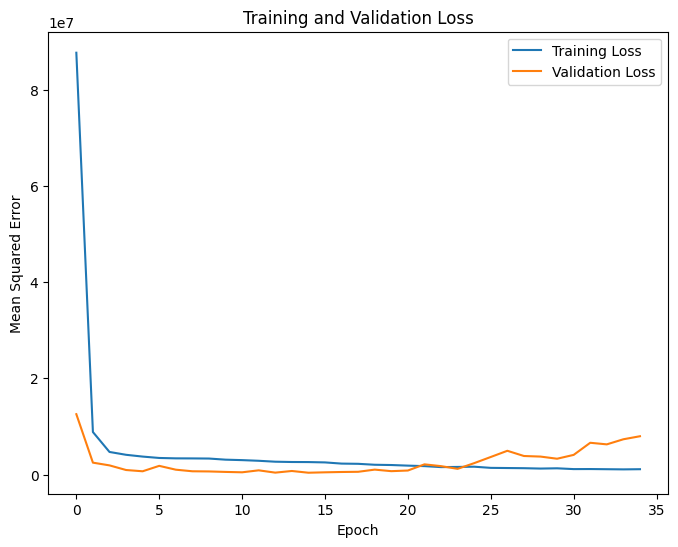

In [85]:
# Plot predicted vs actual prices on the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k-', color='red', lw=2)
plt.title('Actual vs Predicted Prices on Test Set')
plt.xlabel('Actual Price (GBP)')
plt.ylabel('Predicted Price (GBP)')
plt.show()

# Plot training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

##### Build the ANN model and tune by varying the droput from 0.2 to 0.1 while maintaining the other immediate previous parameters 

In [86]:

from keras.optimizers import Adam

# will set the learning_rate to 0.01 here.
adam_optimizer = Adam(learning_rate = 0.01)


model = Sequential()



# Add the first hidden layer, with
# input_dim = 6, 64 units, and the
# ReLU activation function.
model.add(Dense(units=64, input_dim=X_train_preprocessed_dense.shape[1], activation='relu'))

# Add a dropout layer with a 10% dropout rate.
model.add(Dropout(0.1))

# Second hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units=64, activation='relu'))

# Third hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units=64, activation='relu'))

# fourth hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units=64, activation='relu'))


# The output layer, this will have 1 unit
# because we are predicting one value
# (the price). Also, we will use the linear
# activation function, because this is a
# regression problem, predicting a
# continuous output variable.
model.add(Dense(units=1, activation='linear'))

# Print a summary of the model
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                1728      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 14273 (55.75 KB)
Trainable params: 14273

##### Compile and train the model, then make prediction from history

In [87]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Define early stopping criterion
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# Train the model with the manually split training and validation sets
history = model.fit(X_train_preprocessed_dense, y_train, epochs=200, batch_size=None,
                    validation_data=(X_val_preprocessed_dense, y_val), verbose=1, callbacks=[early_stopping])

# Make predictions on the test set
X_test_preprocessed = preprocessing_pipeline.transform(X_test)
X_test_preprocessed_dense = X_test_preprocessed.toarray()
y_pred = model.predict(X_test_preprocessed_dense)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print or use the metrics as needed
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

Epoch 1/200
1000/1000 [==============================] - 9s 7ms/step - loss: 83290560.0000 - mean_squared_error: 83290560.0000 - val_loss: 8778544.0000 - val_mean_squared_error: 8778544.0000
Epoch 2/200
1000/1000 [==============================] - 6s 6ms/step - loss: 6519376.5000 - mean_squared_error: 6519376.5000 - val_loss: 2017165.0000 - val_mean_squared_error: 2017165.0000
Epoch 3/200
1000/1000 [==============================] - 6s 6ms/step - loss: 3330917.7500 - mean_squared_error: 3330917.7500 - val_loss: 1200617.0000 - val_mean_squared_error: 1200617.0000
Epoch 4/200
1000/1000 [==============================] - 5s 5ms/step - loss: 2468445.0000 - mean_squared_error: 2468445.0000 - val_loss: 1037318.5625 - val_mean_squared_error: 1037318.5625
Epoch 5/200
1000/1000 [==============================] - 7s 7ms/step - loss: 2035329.6250 - mean_squared_error: 2035329.6250 - val_loss: 436654.5625 - val_mean_squared_error: 436654.5625
Epoch 6/200
1000/1000 [==============================] 

##### Visualize the model

C:\Users\user\AppData\Local\Temp\ipykernel_1288\505579764.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k-', color='red', lw=2)


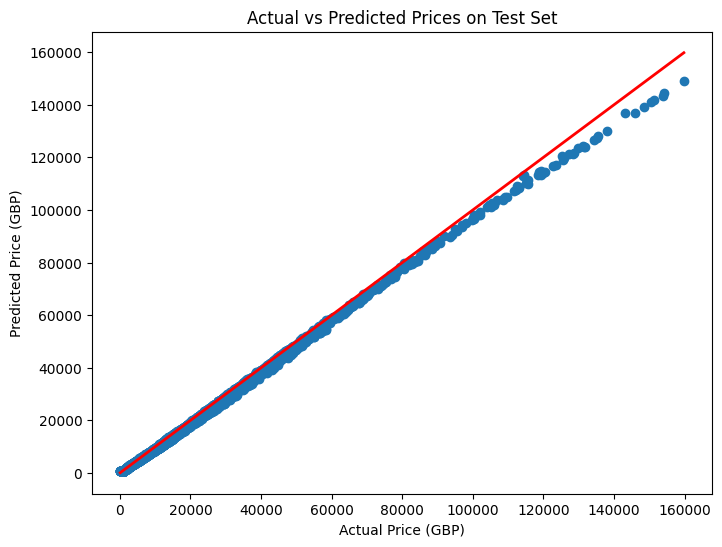

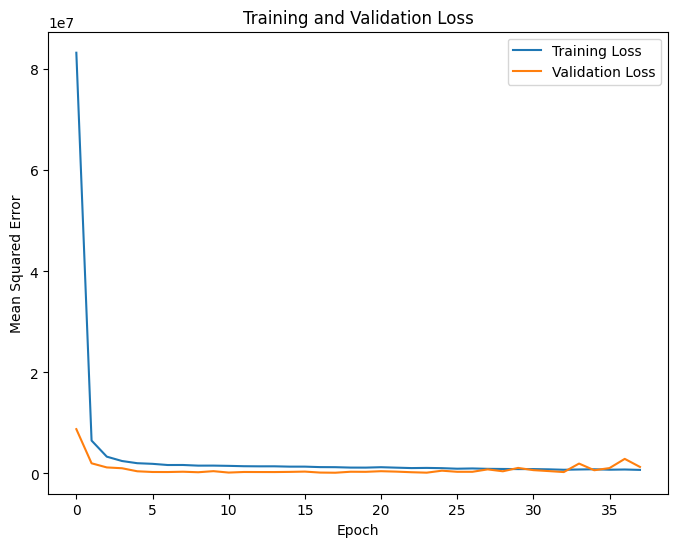

In [88]:
# Plot predicted vs actual prices on the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k-', color='red', lw=2)
plt.title('Actual vs Predicted Prices on Test Set')
plt.xlabel('Actual Price (GBP)')
plt.ylabel('Predicted Price (GBP)')
plt.show()

# Plot training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

### Exeercise 1 F

### Using the k-Means clustering algorithm to identify clusters in the car sales data

- building the k-Means model
- plot the inertia as a function of the number of clusters, k.

###### k-Means Clustering - Price versus Engine Size

C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Program Files\Python311\Lib\site-packages\skl

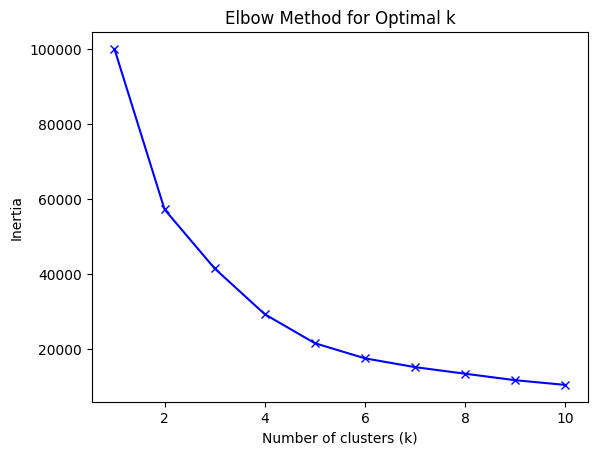

In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Loading  and preprocessing the needed data

# Extract the input features
feature_names1 = ["Engine size", "Price"]
x = car_sales_df[feature_names1]

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit and transform the data using the StandardScaler
x_scaled = scale.fit_transform(x)

# Specify the range of k values you want to try
k_range = range(1, 11)  # Adjust the range as needed

# Initialize an empty list to store the inertia values
inertia = []

# Iterate over the range of k values and fit the model for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

# Use matplotlib to plot the inertia versus k
plt.plot(k_range, inertia, 'bx-')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()


In [41]:
# Fit the final k-Means model
# with our chosen k=3
kmeans_final = KMeans(n_clusters = 3, random_state = 42)
kmeans_final.fit(x_scaled)
# Use this fit to predict the cluster labels for
# each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)
# Import the internal measures
from sklearn.metrics import davies_bouldin_score, silhouette_score
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)
# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))


C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies Bouldin Index: 0.8982
Silhouette Coefficient: 0.4727


In [42]:
# Fit the final k-Means model
# with our chosen k=4
kmeans_final = KMeans(n_clusters = 4, random_state = 42)
kmeans_final.fit(x_scaled)
# Use this fit to predict the cluster labels for
# each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)


# Import the internal measures
from sklearn.metrics import davies_bouldin_score, silhouette_score
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)
# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies Bouldin Index: 0.7636
Silhouette Coefficient: 0.4929


- The best K value is 4 becuase of the lower Davies Bouldin scores (0.7636) and higher Silhouette Coefficient(0.4929)

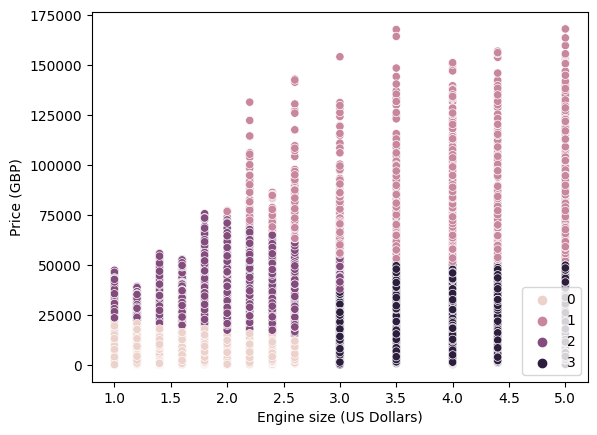

In [43]:


# Visualise the clusters in a scatter plot

sns.scatterplot(data = car_sales_df, x = "Engine size", y = "Price", hue = cluster_labels_pred)
# Add a legend to show the cluster labels
plt.legend(loc = "lower right")
# Label both axes
plt.xlabel("Engine size (US Dollars)")
plt.ylabel("Price (GBP)")
# Show the figure
plt.show()

In [44]:
clustered_data = pd.concat([x,pd.Series(cluster_labels_pred)],axis = 1)
clustered_data.columns =['Engine size', 'Price', 'Cluster']
clustered_data
multiple_condition_lambda = lambda x: 'medium_engine_size_medium_price' if x == 0 else('high_engine_size_high_price 'if x==1
                                                                                   else 'medium_engine_size_low_price')
clustered_data['Cluster_'] = clustered_data['Cluster'].apply(multiple_condition_lambda)
clustered_data

,Engine size,Price,Cluster,Cluster_
0,1.0,3074,0,medium_engine_size_medium_price
1,4.0,49704,3,medium_engine_size_low_price
2,1.6,24072,2,medium_engine_size_low_price
3,1.8,1705,0,medium_engine_size_medium_price
4,1.0,4101,0,medium_engine_size_medium_price
...,...,...,...,...
49995,5.0,113006,1,high_engine_size_high_price
49996,1.8,9430,0,medium_engine_size_medium_price
49997,1.6,49852,2,medium_engine_size_low_price
49998,1.0,23630,2,medium_engine_size_low_price


##### k-Means Clustering - Price versus Year of manufacture

C:\Users\user\Documents\Python Scripts\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\Documents\Python Scripts\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\Documents\Python Scripts\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\Documents\Python Scripts\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


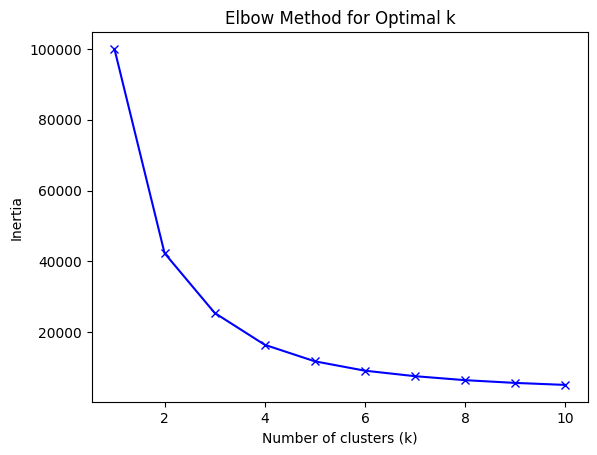

In [94]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the given features
# Load and preprocess data as needed

# Extract the input features
feature_names2 = ["Year of manufacture", "Price"]
x = car_sales_df[feature_names2]

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit and transform the data using the StandardScaler
x_scaled = scale.fit_transform(x)

# Specify the range of k values you want to try
k_range = range(1, 11)  # Adjust the range as needed

# Initialize an empty list to store the inertia values
inertia = []

# Iterate over the range of k values and fit the model for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

# Use matplotlib to plot the inertia versus k
plt.plot(k_range, inertia, 'bx-')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()


In [95]:
# Fit the final k-Means model
# with our chosen k=4
kmeans_final = KMeans(n_clusters = 4, random_state = 42)
kmeans_final.fit(x_scaled)
# Use this fit to predict the cluster labels for
# each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)
# Import the internal measures
from sklearn.metrics import davies_bouldin_score, silhouette_score
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)
# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

C:\Users\user\Documents\Python Scripts\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies Bouldin Index: 0.6433
Silhouette Coefficient: 0.4981


In [96]:
# Fit the final k-Means model
# with our chosen k=3
kmeans_final = KMeans(n_clusters = 3, random_state = 42)
kmeans_final.fit(x_scaled)
# Use this fit to predict the cluster labels for
# each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)
# Import the internal measures
from sklearn.metrics import davies_bouldin_score, silhouette_score
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)
# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

C:\Users\user\Documents\Python Scripts\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies Bouldin Index: 0.6866
Silhouette Coefficient: 0.5139


- Though the DB for K = 4 is lower(better), the SC for K =3 is higher(better)and on this basis,the visualization plot is implemented

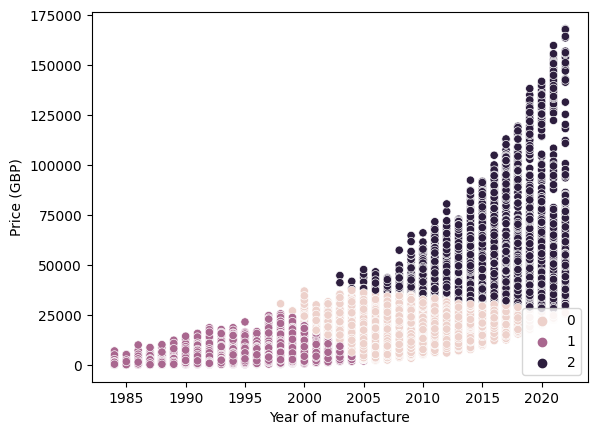

In [97]:
# Visualise the clusters in a scatter plot
# usink k = 3

sns.scatterplot(data = car_sales_df, x = "Year of manufacture", y = "Price", hue = cluster_labels_pred)
# Add a legend to show the cluster labels
plt.legend(loc = "lower right")
# Label both axes
plt.xlabel("Year of manufacture")
plt.ylabel("Price (GBP)")
# Show the figure
plt.show()

In [98]:
clustered_data1 = pd.concat([x,pd.Series(cluster_labels_pred)],axis = 1)
clustered_data1.columns =['Year of manufacture', 'Price', 'Cluster']
clustered_data1
multiple_condition_lambda1 = lambda x: 'high_year_of_manufacture_low_price' if x == 0 else('medium_year_of_manufacture_low_price 'if x==1
                                                                                   else 'high_year_of_manufacture_high_price')
clustered_data1['Cluster_'] = clustered_data1['Cluster'].apply(multiple_condition_lambda1)
clustered_data1

,Year of manufacture,Price,Cluster,Cluster_
0,2002,3074,1,medium_year_of_manufacture_low_price
1,2016,49704,2,high_year_of_manufacture_high_price
2,2014,24072,0,high_year_of_manufacture_low_price
3,1988,1705,1,medium_year_of_manufacture_low_price
4,2006,4101,0,high_year_of_manufacture_low_price
...,...,...,...,...
49995,2018,113006,2,high_year_of_manufacture_high_price
49996,2003,9430,1,medium_year_of_manufacture_low_price
49997,2022,49852,2,high_year_of_manufacture_high_price
49998,2016,23630,0,high_year_of_manufacture_low_price


##### k-Means Clustering - Price versus Mileage

C:\Users\user\Documents\Python Scripts\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\Documents\Python Scripts\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\Documents\Python Scripts\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\Documents\Python Scripts\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


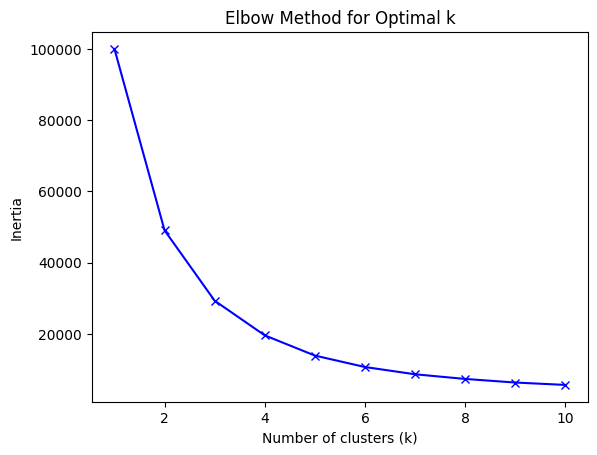

In [99]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the given features
# Load and preprocess data as needed

# Extract the input features
feature_names3 = ["Mileage", "Price"]
x = car_sales_df[feature_names3]

# Create an instance of the StandardScaler class
scale = StandardScaler()

# Fit and transform the data using the StandardScaler
x_scaled = scale.fit_transform(x)

# Specify the range of k values you want to try
k_range = range(1, 11)  # Adjust the range as needed

# Initialize an empty list to store the inertia values
inertia = []

# Iterate over the range of k values and fit the model for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

# Use matplotlib to plot the inertia versus k
plt.plot(k_range, inertia, 'bx-')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()


In [100]:
# Fit the final k-Means model
# with our chosen k=4
kmeans_final = KMeans(n_clusters = 4, random_state = 42)
kmeans_final.fit(x_scaled)
# Use this fit to predict the cluster labels for
# each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)
# Import the internal measures
from sklearn.metrics import davies_bouldin_score, silhouette_score
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)
# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

C:\Users\user\Documents\Python Scripts\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies Bouldin Index: 0.6577
Silhouette Coefficient: 0.4703


In [101]:
# Fit the final k-Means model
# with our chosen k=3
kmeans_final = KMeans(n_clusters = 3, random_state = 42)
kmeans_final.fit(x_scaled)
# Use this fit to predict the cluster labels for
# each data point in the dataset.
cluster_labels_pred = kmeans_final.predict(x_scaled)

# Import the internal measures
from sklearn.metrics import davies_bouldin_score, silhouette_score
# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
# Calculate the Silhouette coefficient
s_score = silhouette_score(x_scaled, cluster_labels_pred)
# Print the results
print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

C:\Users\user\Documents\Python Scripts\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies Bouldin Index: 0.6870
Silhouette Coefficient: 0.4786


- Though the DB for K = 4 is higher (better), the SC for K =3 is higher(better)and on this basis,the visualization plot is implemented

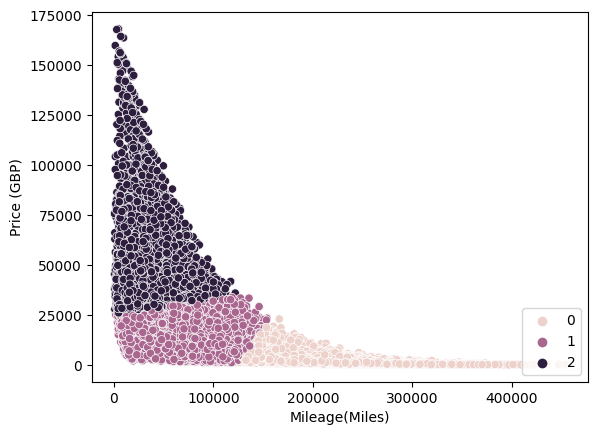

In [102]:
# Visualise the clusters in a scatter plot

sns.scatterplot(data = car_sales_df, x = "Mileage", y = "Price", hue = cluster_labels_pred)
# Add a legend to show the cluster labels
plt.legend(loc = "lower right")
# Label both axes
plt.xlabel("Mileage(Miles)")
plt.ylabel("Price (GBP)")
# Show the figure
plt.show()

In [103]:
clustered_data2 = pd.concat([x,pd.Series(cluster_labels_pred)],axis = 1)
clustered_data2.columns =['Mileage', 'Price', 'Cluster']
clustered_data2
multiple_condition_lambda2 = lambda x: 'high_mileage_low_price' if x == 0 else('low_mileage_low_price 'if x==1
                                                                                   else 'low_mileage_high_price')
clustered_data2['Cluster_'] = clustered_data1['Cluster'].apply(multiple_condition_lambda2)
clustered_data2

,Mileage,Price,Cluster,Cluster_
0,127300,3074,0,low_mileage_low_price
1,57850,49704,2,low_mileage_high_price
2,39190,24072,1,high_mileage_low_price
3,210814,1705,0,low_mileage_low_price
4,127869,4101,1,high_mileage_low_price
...,...,...,...,...
49995,28664,113006,2,low_mileage_high_price
49996,105120,9430,1,low_mileage_low_price
49997,4030,49852,2,low_mileage_high_price
49998,26468,23630,1,high_mileage_low_price


### Exercise 1 G: Using DBSCAN (Density-Based Spatial Clustering of Applications with Noise): to identify clusters

#### DBSCAN Clustering – Price versus Engine size

Davies Bouldin Index: 2.6414
Silhouette Coefficient: 0.0608


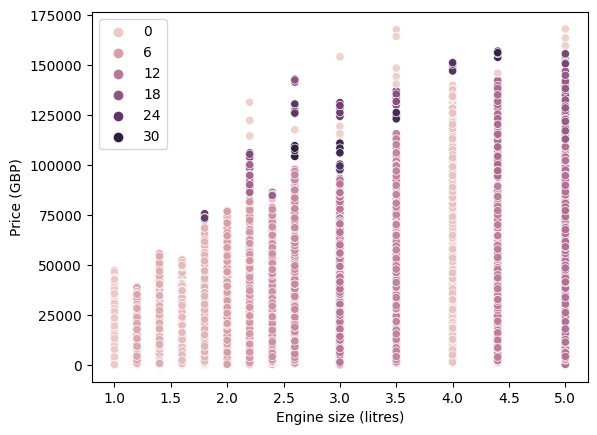

In [104]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the input features
feature_names = ["Engine size", "Price"]
x = car_sales_df[feature_names]

# Scale the input features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Import the DBSCAN model from sklearn.
dbscan = DBSCAN(eps=0.2, min_samples=3)

# Fit the model to the input data and output
# the predicted cluster labels from this model.
dbscan_labels_pred = dbscan.fit_predict(x_scaled)

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, dbscan_labels_pred)

# Calculate the Silhouette coefficient
silhouette_coefficient = silhouette_score(x_scaled, dbscan_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % db_score)
print("Silhouette Coefficient: %.4f" % silhouette_coefficient)

# Visualise the clusters
sns.scatterplot(data=car_sales_df, x="Engine size", y="Price", hue=dbscan_labels_pred)

# Label both axes
plt.xlabel("Engine size (litres)")
plt.ylabel("Price (GBP)")

# Show the plot
plt.show()


#### DBSCAN Clustering – Price versus Year of manufacture

Davies Bouldin Index: 1.4952
Silhouette Coefficient: 0.6763


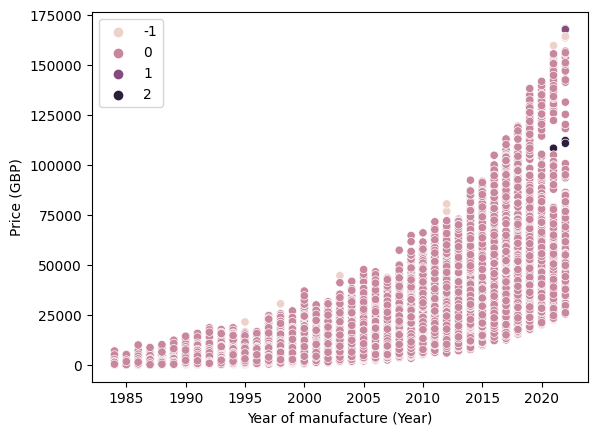

In [105]:
# Extract the input features
feature_names = ["Year of manufacture", "Price"]
x = car_sales_df[feature_names]

# Scale the input features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Import the DBSCAN model from sklearn.
dbscan = DBSCAN(eps=0.2, min_samples=3)

# Fit the model to the input data and output
# the predicted cluster labels from this model.
dbscan_labels_pred = dbscan.fit_predict(x_scaled)

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, dbscan_labels_pred)

# Calculate the Silhouette coefficient
silhouette_coefficient = silhouette_score(x_scaled, dbscan_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % db_score)
print("Silhouette Coefficient: %.4f" % silhouette_coefficient)

# Visualise the clusters
sns.scatterplot(data=car_sales_df, x="Year of manufacture", y="Price", hue=dbscan_labels_pred)

# Label both axes
plt.xlabel("Year of manufacture (Year)")
plt.ylabel("Price (GBP)")

# Show the plot
plt.show()


#### DBSCAN Clustering – Price versus Mileage

Davies Bouldin Index: 0.1570
Silhouette Coefficient: 0.8178


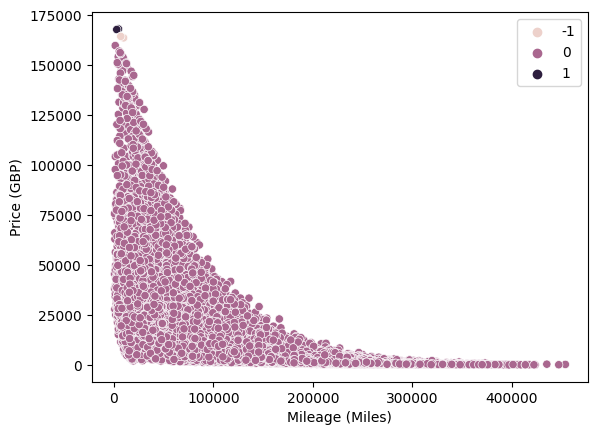

In [106]:
# Extract the input features
feature_names = ["Mileage", "Price"]
x = car_sales_df[feature_names]

# Scale the input features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Import the DBSCAN model from sklearn.
dbscan = DBSCAN(eps=0.2, min_samples=3)

# Fit the model to the input data and output
# the predicted cluster labels from this model.
dbscan_labels_pred = dbscan.fit_predict(x_scaled)

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, dbscan_labels_pred)

# Calculate the Silhouette coefficient
silhouette_coefficient = silhouette_score(x_scaled, dbscan_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % db_score)
print("Silhouette Coefficient: %.4f" % silhouette_coefficient)

# Visualise the clusters
sns.scatterplot(data=car_sales_df, x="Mileage", y="Price", hue=dbscan_labels_pred)

# Label both axes
plt.xlabel("Mileage (Miles)")
plt.ylabel("Price (GBP)")

# Show the plot
plt.show()


###### Agglomerative-Clustering

In [45]:
##### For Price and Year of manufacturer

Davies Bouldin Index: 0.6996
Silhouette Coefficient: 0.4589


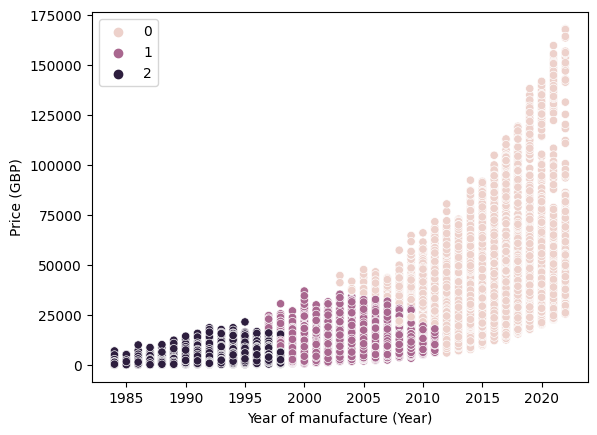

In [11]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Extract the input features
feature_names = ["Year of manufacture", "Price"]
x = car_sales_df[feature_names]

# Scale the input features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Import the AgglomerativeClustering model from sklearn.
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Fit the model to the input data and output
# the predicted cluster labels from this model.
agg_labels_pred = agg_clustering.fit_predict(x_scaled)

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, agg_labels_pred)

# Calculate the Silhouette coefficient
silhouette_coefficient = silhouette_score(x_scaled, agg_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % db_score)
print("Silhouette Coefficient: %.4f" % silhouette_coefficient)

# Visualise the clusters
sns.scatterplot(data=car_sales_df, x="Year of manufacture", y="Price", hue=agg_labels_pred)

# Label both axes
plt.xlabel("Year of manufacture (Year)")
plt.ylabel("Price (GBP)")

# Show the plot
plt.show()


##### For Price and Engine size

Davies Bouldin Index: 0.8447
Silhouette Coefficient: 0.5558


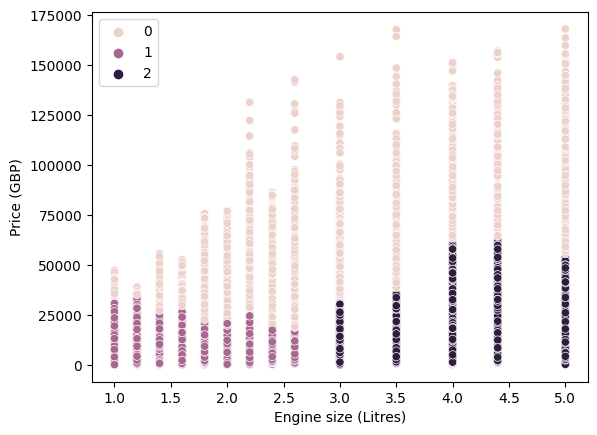

In [14]:

# Extract the input features
feature_names = ["Engine size", "Price"]
x = car_sales_df[feature_names]

# Scale the input features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Import the AgglomerativeClustering model from sklearn.
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Fit the model to the input data and output

agg_labels_pred = agg_clustering.fit_predict(x_scaled)

# Calculate DB index
db_score = davies_bouldin_score(x_scaled, agg_labels_pred)

# Calculate the Silhouette coefficient
silhouette_coefficient = silhouette_score(x_scaled, agg_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % db_score)
print("Silhouette Coefficient: %.4f" % silhouette_coefficient)

# Visualise the clusters
sns.scatterplot(data=car_sales_df, x="Engine size", y="Price", hue=agg_labels_pred)

# Label both axes
plt.xlabel("Engine size (Litres)")
plt.ylabel("Price (GBP)")

# Show the plot
plt.show()


##### For Price and Mileage

Davies Bouldin Index: 0.7083
Silhouette Coefficient: 0.4636


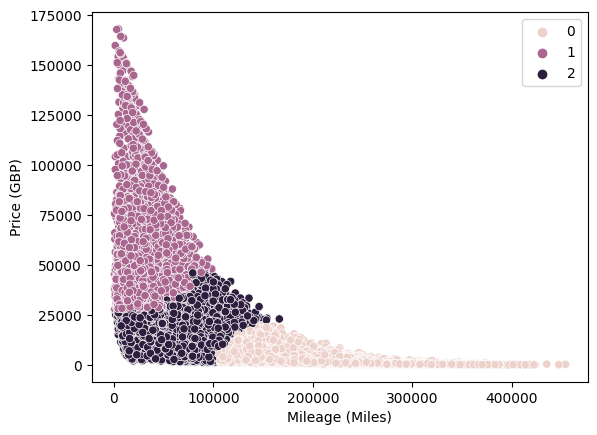

In [13]:

# Extract the input features
feature_names = ["Mileage", "Price"]
x = car_sales_df[feature_names]

# Scale the input features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Import the AgglomerativeClustering model from sklearn.
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Fit the model to the input data and output
# the predicted cluster labels from this model.
agg_labels_pred = agg_clustering.fit_predict(x_scaled)

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(x_scaled, agg_labels_pred)

# Calculate the Silhouette coefficient
silhouette_coefficient = silhouette_score(x_scaled, agg_labels_pred)

# Print the results
print("Davies Bouldin Index: %.4f" % db_score)
print("Silhouette Coefficient: %.4f" % silhouette_coefficient)

# Visualise the clusters
sns.scatterplot(data=car_sales_df, x="Mileage", y="Price", hue=agg_labels_pred)

# Label both axes
plt.xlabel("Mileage (Miles)")
plt.ylabel("Price (GBP)")

# Show the plot
plt.show()
